In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm_notebook
from config import gkey
import scipy.stats as stats

In [2]:
zip_data = "Project1_State_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [3]:
zip_data_df = zip_data_df.loc[zip_data_df['State'] != 'Puerto Rico']

In [4]:
zip_data_df

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No High School Diploma Rate,Total HS Diploma,...,Total educational attainment over 25,Never Married,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status
0,Alabama,4850771.0,38.7,46472.0,25746.0,849699.0,17.51678238366643,481059,14.681485925966168,1012551,...,3276637.0,1197758,30.38944405512612,1979275,50.21804645196255,280457,7.115738163609432,483872,12.276771329301901,3941362.0
1,Alaska,738565.0,33.9,76114.0,35065.0,73380.0,9.935482997434214,36177,7.609130030582069,131293,...,475442.0,198336,34.0693941283477,294776,50.63548586024636,21707,3.7287448488627564,67334,11.56637516254318,582153.0
2,Arizona,6809946.0,37.2,53510.0,27964.0,1128046.0,16.564683479134782,609649,13.499233311375223,1091339,...,4516175.0,1807995,33.10126984365282,2681012,49.08470524867123,301048,5.511669603008855,671956,12.302355304667092,5462011.0
3,Arkansas,2977944.0,37.9,43813.0,24426.0,524211.0,17.603118124450962,286117,14.408365520679636,681486,...,1985770.0,660401,27.611923449361214,1253607,52.41436720959442,165004,6.898956568567276,312712,13.07475277247709,2391724.0
4,California,38982847.0,36.1,67169.0,33128.0,5773408.0,14.81012405276608,4543530,17.508234229842003,5345542,...,25950818.0,11553117,36.770353153497695,15330135,48.7915493144227,1568495,4.992082662150428,2967905,9.446014869929177,31419652.0
5,Colorado,5436519.0,36.5,65458.0,34845.0,612143.0,11.259833728163187,325019,8.859780230324464,791683,...,3668477.0,1381304,31.453785521463452,2295701,52.275593841333375,191533,4.361413492093312,522997,11.909207145109853,4391535.0
6,Connecticut,3594478.0,40.8,73781.0,41365.0,350783.0,9.758941353932338,242500,9.777054925277094,673582,...,2480297.0,1021939,34.34023662574603,1463893,49.191225713837355,173962,5.845648560127396,316129,10.622889100289221,2975923.0
7,Delaware,943732.0,39.8,63036.0,32625.0,111304.0,11.79402627016992,69644,10.689136507351812,203135,...,651540.0,259074,33.453680532420144,382058,49.3343456960381,47076,6.078824832843939,86218,11.133148938697824,774426.0
8,District of Columbia,672391.0,33.9,77649.0,50832.0,111025.0,16.51196996985385,46497,9.730601892253313,84119,...,477843.0,318002,55.80118059113784,174820,30.676418358823902,25305,4.440377339949884,51757,9.082023710088368,569884.0
9,Florida,20278447.0,41.8,50883.0,28774.0,3070972.0,15.144019657915619,1787348,12.415530742912683,4170468,...,14396066.0,5298244,31.376268043558298,8225019,48.708666646413384,1177656,6.974093741078118,2185232,12.940971568950202,16886151.0


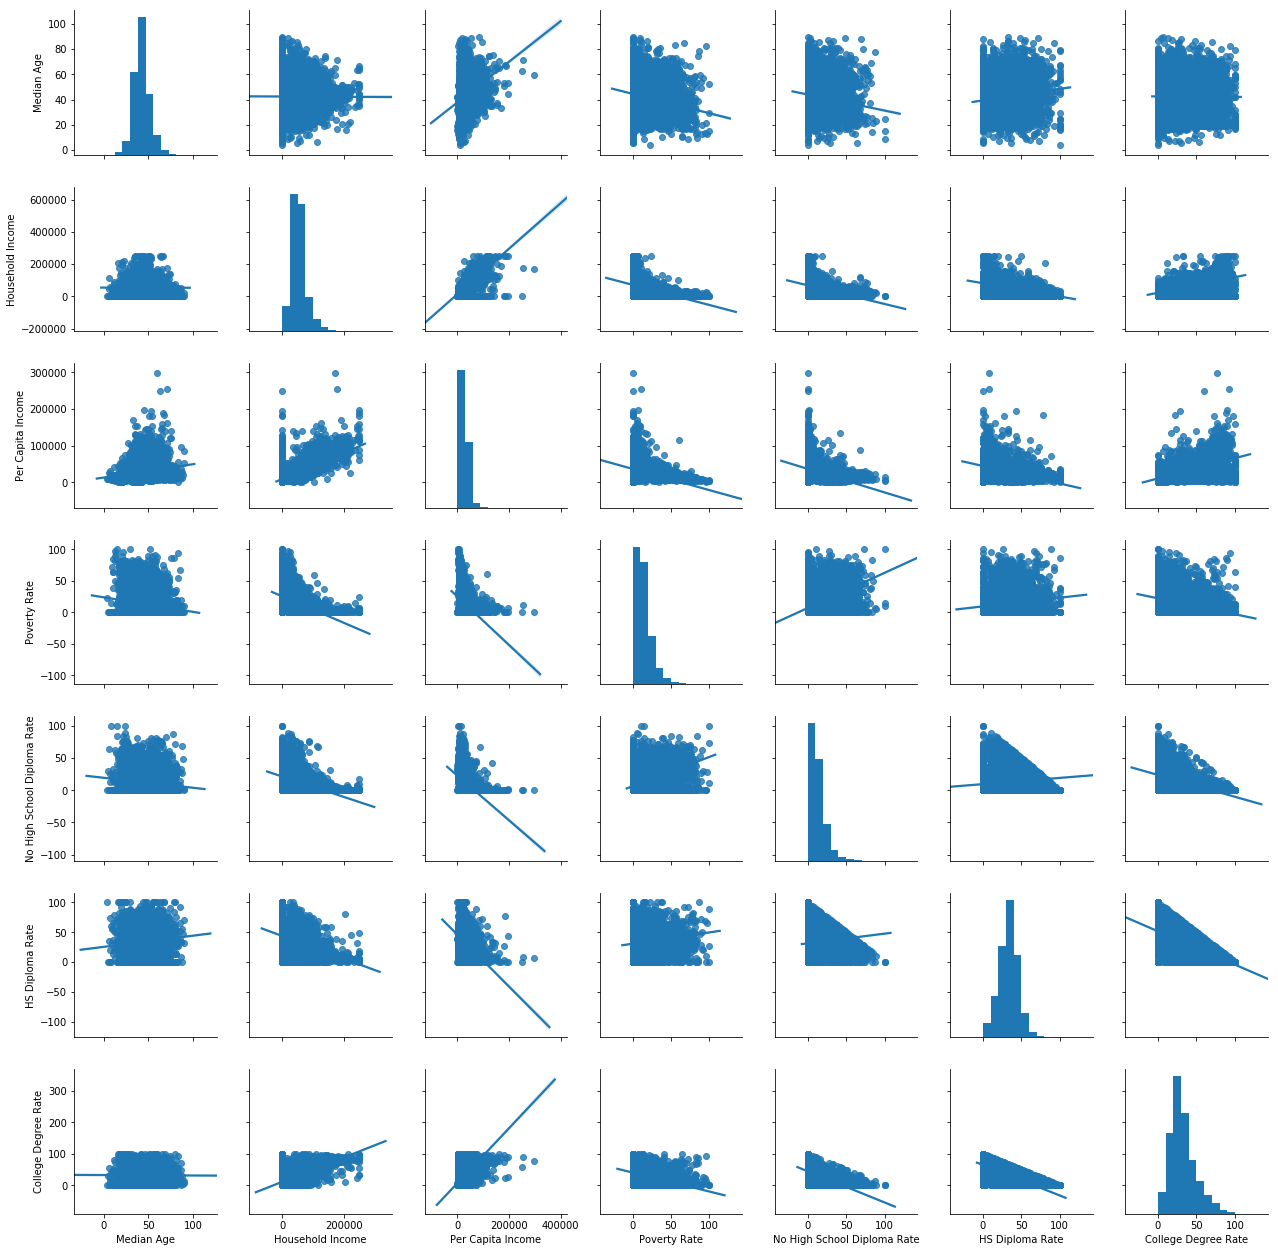

In [22]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No High School Diploma Rate"] = zip_data_df["No High School Diploma Rate"].astype(float)
zip_data_df["HS Diploma Rate"] = zip_data_df["HS Diploma Rate"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                    "Poverty Rate", "No High School Diploma Rate", 'HS Diploma Rate', 'College Degree Rate']]

# seaborn pair plot
sns.pairplot(census_data_numeric, kind="reg")

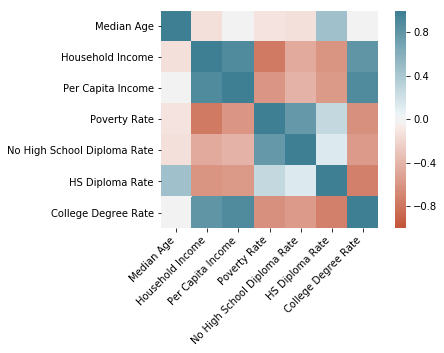

In [6]:
# heat map on correlation matrix
corr = census_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

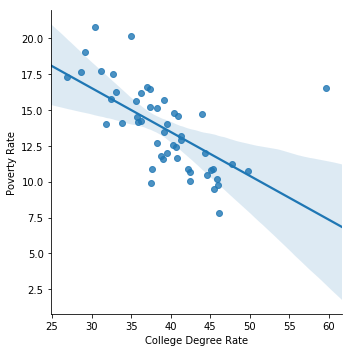

In [7]:
sns.lmplot(y='Poverty Rate', x='College Degree Rate', data=census_data_numeric)

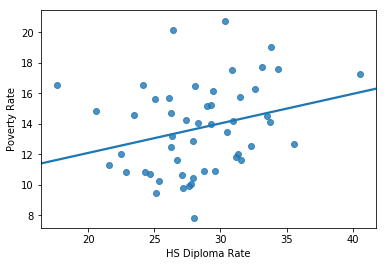

In [8]:
ax = sns.regplot(x='HS Diploma Rate', y='Poverty Rate', data=census_data_numeric, ci=0)
fig = ax.get_figure()
fig.savefig('HS Rate vs Poverty Rate') 

In [24]:
r_value

NameError: name 'r_value' is not defined

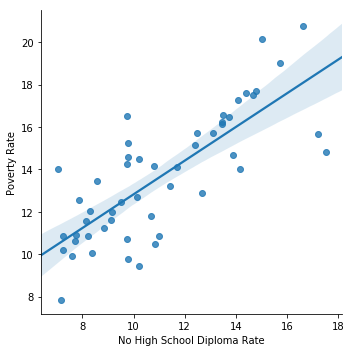

In [9]:
sns.lmplot(y='Poverty Rate', x='No High School Diploma Rate', data=census_data_numeric)

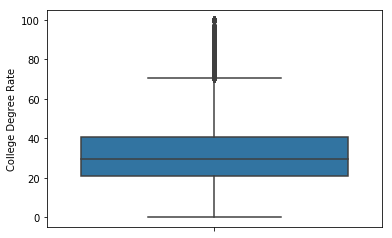

In [23]:
import seaborn as sns
#ax = sns.boxplot(y="Household Income", data=zip_data_df)
ax = sns.boxplot(y="College Degree Rate", data=zip_data_df)

In [11]:
census_data_numeric.head()

,Median Age,Household Income,Per Capita Income,Poverty Rate,No High School Diploma Rate,HS Diploma Rate,College Degree Rate
0,38.7,46472.0,25746.0,17.516782,14.681486,30.902141,32.680550
1,33.9,76114.0,35065.0,9.935483,7.609130,27.614935,37.445367
2,37.2,53510.0,27964.0,16.564683,13.499233,24.165118,37.014376
3,37.9,43813.0,24426.0,17.603118,14.408366,34.318476,28.686555
4,36.1,67169.0,33128.0,14.810124,17.508234,20.598742,40.367417


In [12]:
zip_data = "Project1_Zipcode_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [13]:
zip_data_df.head()

,Zip Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No High School Diploma Rate,Total HS Diploma,...,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status,lat,lng,city,state_id,state_name
0,00601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915108813,4288,36.12772769399275,2967,...,863,6.019390388505267,1999,13.942944828067239,14337.0,18.18004,-66.75218,Adjuntas,PR,Puerto Rico
1,00602,39209.0,40.9,16190.0,8978.0,20428.0,52.10028309826826,9407,34.17620345140781,6322,...,2136,6.47625977806076,4181,12.676611485052453,32982.0,18.36073,-67.17517,Aguada,PR,Puerto Rico
2,00603,50135.0,40.4,16645.0,10897.0,25176.0,50.21641567767029,10310,29.464719499299818,9657,...,3098,7.442106274622851,5945,14.281253002786586,41628.0,18.45439,-67.12202,Aguadilla,PR,Puerto Rico
3,00606,6304.0,42.8,13387.0,5960.0,4092.0,64.91116751269035,2147,49.40174873446848,1351,...,431,8.181473044798786,534,10.136674259681094,5268.0,18.16724,-66.93828,Maricao,PR,Puerto Rico
4,00610,27590.0,41.4,18741.0,9266.0,12553.0,45.498368974266036,6260,32.553302132085285,6032,...,1772,7.6733209197592345,2659,11.514311696184992,23093.0,18.29032,-67.12243,Anasco,PR,Puerto Rico


In [14]:
West_Virginia_Poverty_Rate = zip_data_df.loc[zip_data_df['state_id'] == 'WV']
West_Virginia_Poverty_Rate = West_Virginia_Poverty_Rate['Poverty Rate'].dropna().astype(float)

In [15]:
West_Virginia_Poverty_Rate.describe()

count    702.000000
mean      19.761651
std       15.336714
min        0.000000
25%        9.918584
50%       17.227753
75%       25.512921
max      100.000000
Name: Poverty Rate, dtype: float64

In [16]:
US_Poverty_Rate = zip_data_df.loc[zip_data_df['state_id'] != 'WV']
US_Poverty_Rate = zip_data_df['Poverty Rate'].dropna().astype(float)

In [17]:
US_Poverty_Rate.describe()

count    32788.000000
mean        14.272887
std         11.426086
min          0.000000
25%          6.692071
50%         11.779896
75%         18.908416
max        100.000000
Name: Poverty Rate, dtype: float64

In [18]:
stats.ttest_ind(West_Virginia_Poverty_Rate, US_Poverty_Rate, equal_var=False)

Ttest_indResult(statistic=9.426391935898547, pvalue=5.716363504816138e-20)

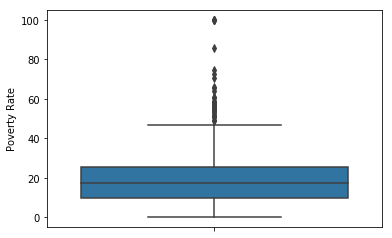

In [19]:
ax = sns.boxplot(y=West_Virginia_Poverty_Rate)

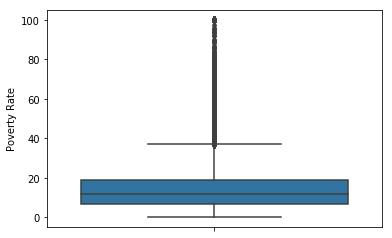

In [20]:
ax = sns.boxplot(y=US_Poverty_Rate)